##Project: 20 Years prediction of airport enplanements (how many people take flights from an airport) using Clark County's population, employment rate, GDP per capita, Visitors values.

## Loading Yearly data

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#import os
import io
from google.colab import files

# Function to upload and read an Excel file
def upload_and_load_excel():
    """Uploads an Excel file and reads it into a pandas DataFrame."""
    print("Please upload the 'Yearly Enplanments data (Harry Reid Airport).xlsx' file:")
    uploaded = files.upload()
    filename = list(uploaded.keys())[0]
    return pd.read_excel(io.BytesIO(uploaded[filename]))

# Load the dataset
df = upload_and_load_excel()

# Display the first few rows to confirm it's loaded correctly
print("\nLoaded Data:")
print(df.head)

Please upload the 'Yearly Enplanments data (Harry Reid Airport).xlsx' file:


Saving Yearly Enplanments data (Harry reid airport).xlsx to Yearly Enplanments data (Harry reid airport) (1).xlsx

Loaded Data:
<bound method NDFrame.head of     years  enplanments clark-county_population  \
0    2000     17425214                 1393909   
1    2001     16633435                 1460500   
2    2002     16600807                 1522962   
3    2003     17097738                 1584166   
4    2004     19943025                 1662773   
5    2005     21402676                 1729522   
6    2006     22028521                 1803774   
7    2007     22537950                 1867817   
8    2008     21024443                 1912349   
9    2009     19445952                 1939407   
10   2010     18996738                 1952640   
11   2011     19872617                 1962162   
12   2012     19959651                 1989644   
13   2013     19946179                 2017798   
14   2014     20620248                 2053929   
15   2015     21857693                 209

## Converting years column into integer

In [19]:

# Step 1: Ensure 'years' column is numeric
#df['years'] = pd.to_numeric(df['years'], errors='coerce')
selected_years = df[df['years'].between(2000, 2024)]

# Step 3: Convert 'years' column to integer (removes decimals), because i am using the regression model where years is treated as numerical feature.
selected_years['years'] = selected_years['years'].astype(int)
selected_years

<ipython-input-19-6cd2809ef446>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_years['years'] = selected_years['years'].astype(int)


,years,enplanments,clark-county_population,clark_county_visitors_volumnes,real_gdp_per_Person%,real_gdp_per_person
0,2000,17425214,1393909,35849691,3,36313
1,2001,16633435,1460500,35017317,0,36313
2,2002,16600807,1522962,35071504,1,36567
3,2003,17097738,1584166,35540126,2,37262
4,2004,19943025,1662773,37388781,3,38343
5,2005,21402676,1729522,38566717,2,39301
6,2006,22028521,1803774,38914889,2,40009
7,2007,22537950,1867817,39196761,1,40409
8,2008,21024443,1912349,37481552,-1,40085
9,2009,19445952,1939407,36351469,-3,38722


## Yearly Trends of enplanments, tourism and population

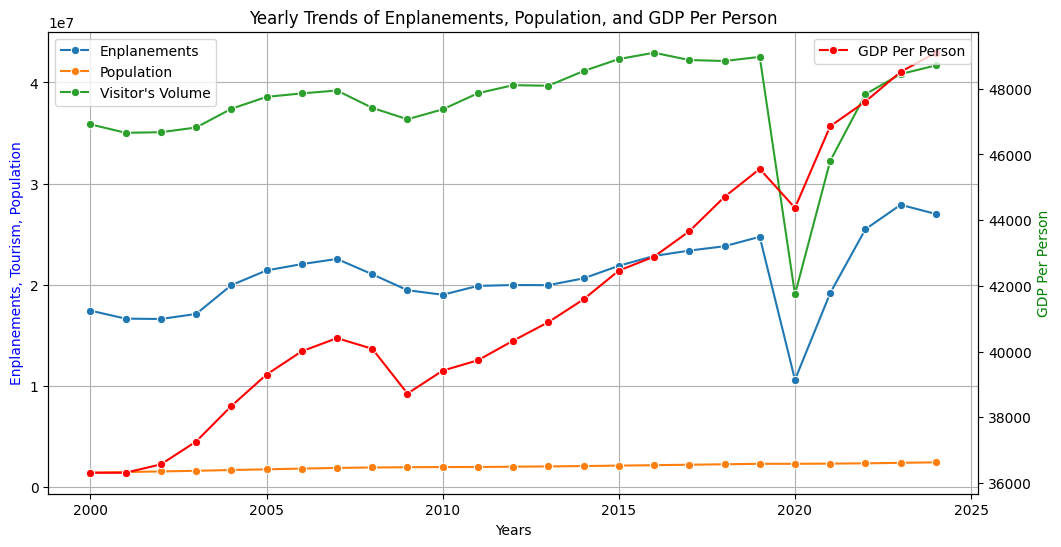

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure and primary y-axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot enplanements, tourism volume, and population on the primary y-axis
sns.lineplot(x=selected_years['years'], y=selected_years['enplanments'], marker='o', label="Enplanements", ax=ax1)
#sns.lineplot(x=selected_years['years'], y=selected_years['clark_county_visitors_volumnes'], marker='o', label="Tourism Volume", ax=ax1)
sns.lineplot(x=selected_years['years'], y=selected_years['clark-county_population'], marker='o', label="Population", ax=ax1)
sns.lineplot(x=selected_years['years'], y=selected_years['clark_county_visitors_volumnes'], marker='o', label="Visitor's Volume", ax=ax1)

# Create secondary y-axis
ax2 = ax1.twinx()
sns.lineplot(x=selected_years['years'], y=selected_years['real_gdp_per_person'], marker='o', color='r', label="GDP Per Person", ax=ax2)

# Labels and title
ax1.set_xlabel("Years")
ax1.set_ylabel("Enplanements, Tourism, Population", color='b')
ax2.set_ylabel("GDP Per Person", color='g')
plt.title("Yearly Trends of Enplanements, Population, and GDP Per Person")

# Grid and legend handling
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
ax1.grid(True)

# Save the figure with high resolution
plt.savefig("Yearly_Trends_HighRes.png", dpi=600, bbox_inches='tight', format='png')
plt.show()


## Interpretation of above Plot:

Overall Trends (2000-2024)

Enplanements (Blue Line): Gradually increased from 2000 until 2020, then dropped sharply in 2020 (likely due to COVID-19) before recovering after 2021.

Tourism Volume (Green Line): Shows a similar trend to enplanements, indicating a strong correlation between tourism and airport passenger traffic.

Population (Orange Line): Steadily increasing over time, showing consistent growth in Clark County.


Impact of COVID-19 (2020-2021)

There is a sharp decline in both enplanements and tourism volume in 2020, reflecting the impact of travel restrictions.
Both metrics rebounded after 2021, showing strong recovery.
Key Insights:

Tourism and enplanements are closely linked , when tourism increases, airport traffic increases.
Clark County population growth is stable, but it does not show sudden spikes like tourism/enplanements.
**Future enplanement trends can likely be predicted using tourism & population data.**

## Feature correlation Heatmap to check the correlation between variables (how strongly feature variables are correlated with passenger count)

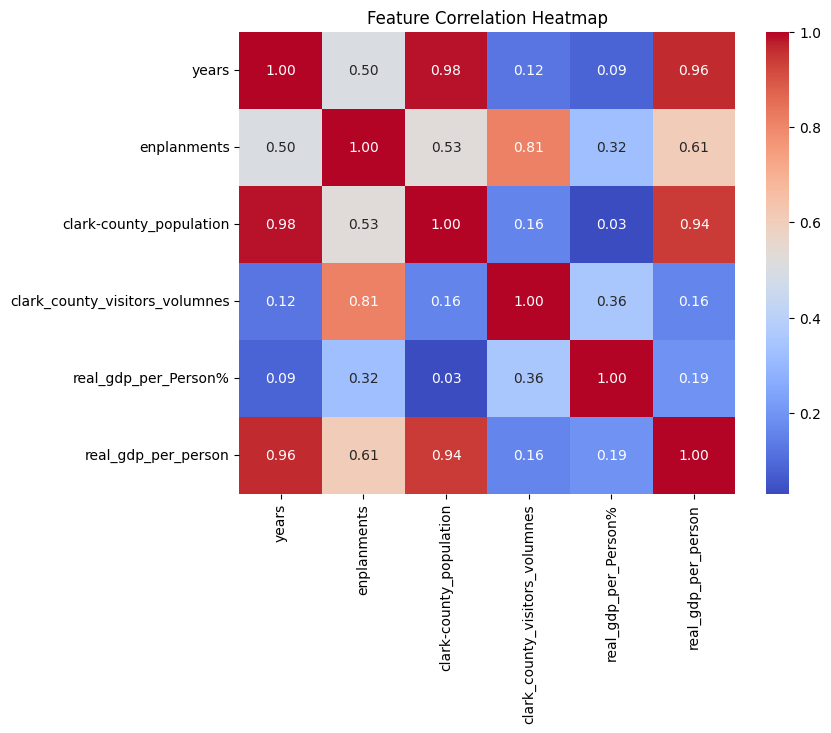

In [21]:
# Compute correlation matrix
correlation_matrix = selected_years.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

## Above heat map interpretation:
**Enplanements & Tourism Volume (0.81):**
Strong positive correlation → More visitors lead to higher airport traffic.
This confirms that tourism volume is a key predictor of enplanements.

**Enplanements & Population (0.53)**
Moderate correlation → Population growth influences enplanements, but other factors (e.g., tourism) may have a stronger impact.

Years & Enplanements (0.50)
Moderate correlation → Enplanements have generally increased over the years, except for certain disruptions (e.g., COVID-19).


## Analysis of Correlation Heatmap and predictor selection
From the correlation heatmap, we observed that tourism volume has the strongest correlation with enplanements (0.81), indicating that tourism is a key driver of airport enplanements. This strong relationship suggests that higher tourism inflows directly contribute to increased airport activity.

However, despite its predictive strength, we cannot use tourism volume as a predictor for future enplanements, since we do not have projected tourism values for future years (2025-2045). Due to this limitation, we rely on Clark County's population growth as our independent variable for prediction, even though its correlation with enplanements is moderate (0.53).

This means that while tourism would be a more accurate predictor, we proceed with population as a substitute for forecasting enplanements. We acknowledge that this approach may not capture all variations, as tourism patterns are influenced by external factors like economic conditions, travel trends, and global events.



## Here Tried to estimate the future tourism values using population data

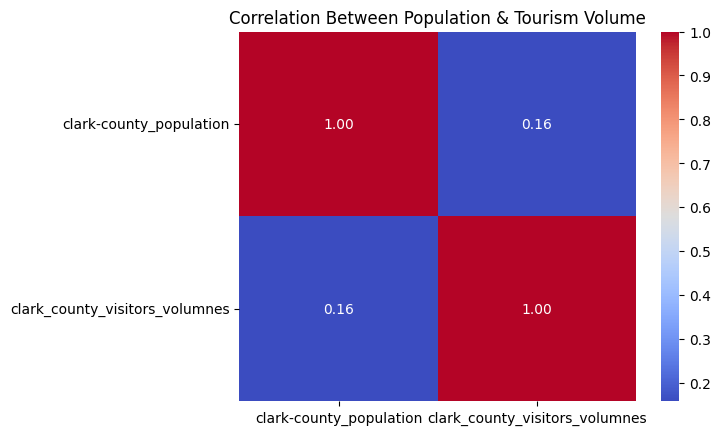

In [22]:
# check correlation between population and tourism
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = selected_years[['clark-county_population', 'clark_county_visitors_volumnes']].corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Population & Tourism Volume")
plt.show()


Above result: A correlation of 0.16 is very weak, meaning population is not a strong predictor of tourism volume. so we cannot predict the tourism volume with population data.

## Apply Econometric Modeling without excluding the Covid Years(2000 and 2024) (Ordinary Least Square Regression OLS) (clark county population as feature)

In [24]:
#using population and GDP features
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Assuming selected_years is dataset containing 2000-2024 data
df = selected_years.copy()  # Make a copy of the dataset

# Ensure population column is float type to avoid log transformation errors
df['clark-county_population'] = df['clark-county_population'].astype(float)
df['enplanments'] = df['enplanments'].astype(float)  # Ensure enplanements are also float

# Log Transformation (As in the Research Paper)
df['log_enplanements'] = np.log(df['enplanments'])
df['log_population'] = np.log(df['clark-county_population'])

df['log_GDP_PerCapita'] = np.log(df['real_gdp_per_person'])

# Define X (Independent Variable) & Y (Dependent Variable)
X = df[['log_population', 'log_GDP_PerCapita']]  # Independent variable (Las Vegas Population)
y = df['log_enplanements']  # Dependent variable (Enplanements)

# Add Constant for Regression (For Intercept)
X = sm.add_constant(X)

#  Fit Linear Regression Model
model = sm.OLS(y, X).fit()

#  Model Summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       log_enplanements   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     3.819
Date:                Sun, 27 Apr 2025   Prob (F-statistic):             0.0377
Time:                        00:37:32   Log-Likelihood:                 9.4561
No. Observations:                  25   AIC:                            -12.91
Df Residuals:                      22   BIC:                            -9.256
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.3706      4.59

## Above result explanation:
Before removing COVID years, the model is weak (R² = 25%) due to extreme fluctuations in enplanements.

Population and GDP Per Capita is not a significant predictor (p-value > 0.05),This means these variables do not have a strong statistical impact on enplanements.

After removing COVID years, the model should improve in terms of R-squared and normality.



## Above model result is not accurate so below i am excluding the covid years (2020, 2021) from dataset, because covid 19 pandemic drastically reduced air travel in 2020 and 2021 and including those years is skewing the regression results, since population did not change much, but enplanments dropped suddenly and **only use the population as feature variable **

In [25]:
#Only population as feature variable and excluded 2020 and 2021 covid years
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = selected_years.copy()

#  Remove COVID years (2020 & 2021)
df = df[~df["years"].isin([2020, 2021])]   #======= change years here to include or exclude the covid years

#  Convert ALL numeric columns to float to avoid integer issues with np.log()
df["enplanments"] = df["enplanments"].astype(float)
df["clark-county_population"] = df["clark-county_population"].astype(float)

#  Apply Log Transformation (After Ensuring Data is Float).Without logs, the relationship is curved, but with logs, it becomes linear.
df["log_enplanements"] = np.log(df["enplanments"])
df["log_population"] = np.log(df["clark-county_population"])

#df['log_GDP_PerCapita'] = np.log(df['real_gdp_per_person'])
#  Define Independent (X) & Dependent (Y) Variables
X = sm.add_constant(df[['log_population']])  # Adding a constant for OLS

# Why Add a Constant?
# The regression model equation is: Y = β₀ + β1X + Error
# sm.add_constant() ensures that the model includes an intercept (β₀).

Y = df["log_enplanements"] # The transformed enplanements data we want to predict.

# Train the model using ordinary Least Squares (OLS) regression. The model tries to find the best-fit line that minimizes the sum of squared residuals.
model = sm.OLS(Y, X).fit()

#  Print Summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       log_enplanements   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     68.51
Date:                Sun, 27 Apr 2025   Prob (F-statistic):           4.75e-08
Time:                        00:37:36   Log-Likelihood:                 28.922
No. Observations:                  23   AIC:                            -53.84
Df Residuals:                      21   BIC:                            -51.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.0708      1.425      3.

Explanation of above result:
Model Fit (How well the model explains the data)

R-squared = 0.765 (76.5%)

This means 76.5% of the variation in enplanements can be explained by the population size. The higher the R-squared, the better the model explains the data.

Model Significance (Overall usefulness of the model)

F-statistic = 68.51 This tests whether at least one predictor (log_population) is useful for prediction.

A higher F-statistic means the model is statistically significant. Prob (F-statistic) = 4.75e-08 Since this value is near zero, the model is highly significant (very strong evidence that population affects enplanements).

** Coefficients (Impact of each predictor):**

Intercept (β₀) = 5.0708

When the log of population is 0, the expected log of enplanements is 5.0708.

log_population (β₁) = 0.8149 For every 1% increase in population, enplanements increase by approximately 0.81% (because we are using log-log transformation). This coefficient is highly significant (p-value = 0.000), meaning population strongly predicts enplanements.

*Omnibus & Jarque-Bera Tests: *

These test if the residuals are normally distributed. The Prob(Omnibus) = 0.129 suggests residuals are close to normal, which is good for OLS.


Summary of Key Findings:

(1) Population is a strong predictor of enplanements, with a statistically significant impact. (2) The model explains 76.5% of the variation in enplanements, showing good predictive power. (3) The positive coefficient (0.8149) means as the population increases, enplanements also increase.

##Future prediction by using above model: Feature population, excluded 2020, 2021 covid years

In [26]:
# Extract model coefficients
intercept, slope = model.params


# Generate Future Years (2025-2045)


# Create a DataFrame for future years (2025-2045)
future_years = pd.DataFrame({'years': np.arange(2025, 2045)})

#predicted population values
predicted_population = {
    2025: 2443000, 2026: 2493000, 2027: 2537000, 2028: 2578000, 2029: 2617000,
    2030: 2655000, 2031: 2692000, 2032: 2728000, 2033: 2764000, 2034: 2797000,
    2035: 2830000, 2036: 2860000, 2037: 2889000, 2038: 2917000, 2039: 2944000,
    2040: 2969000, 2041: 2994000, 2042: 3017000, 2043: 3039000, 2044: 3061000,
    2045: 3081000
}

# Add the predicted population to the future DataFrame
future_years['clark-county_population'] = future_years['years'].map(predicted_population)

# Predict Future Enplanements

# Apply Regression Formula to Predict Log Enplanements
future_years['Predicted_Log_Enplanements'] = intercept + slope * np.log(future_years['clark-county_population']) # this applies the linear regression formula.  log(Enplanements)=intercept+slope×log(Population)

# Convert Log Enplanements Back to Actual Enplanements using exponential function.
future_years['Predicted_Enplanements'] = np.exp(future_years['Predicted_Log_Enplanements'])



#  Display Results
print(future_years)

    years  clark-county_population  Predicted_Log_Enplanements  \
0    2025                  2443000                          17   
1    2026                  2493000                          17   
2    2027                  2537000                          17   
3    2028                  2578000                          17   
4    2029                  2617000                          17   
5    2030                  2655000                          17   
6    2031                  2692000                          17   
7    2032                  2728000                          17   
8    2033                  2764000                          17   
9    2034                  2797000                          17   
10   2035                  2830000                          17   
11   2036                  2860000                          17   
12   2037                  2889000                          17   
13   2038                  2917000                          17   
14   2039 

Above code summary:
Step 1: Extract coefficients from the trained model Step 2: Create a DataFrame with years 2025-2045 Step 3: Assign predicted population values Step 4: Apply regression formula to predict future enplanements Step 5: Convert log values back and print results

Display Historical and predicted Enplanments: see trends over time and how enplanements are expected to grow in the future.

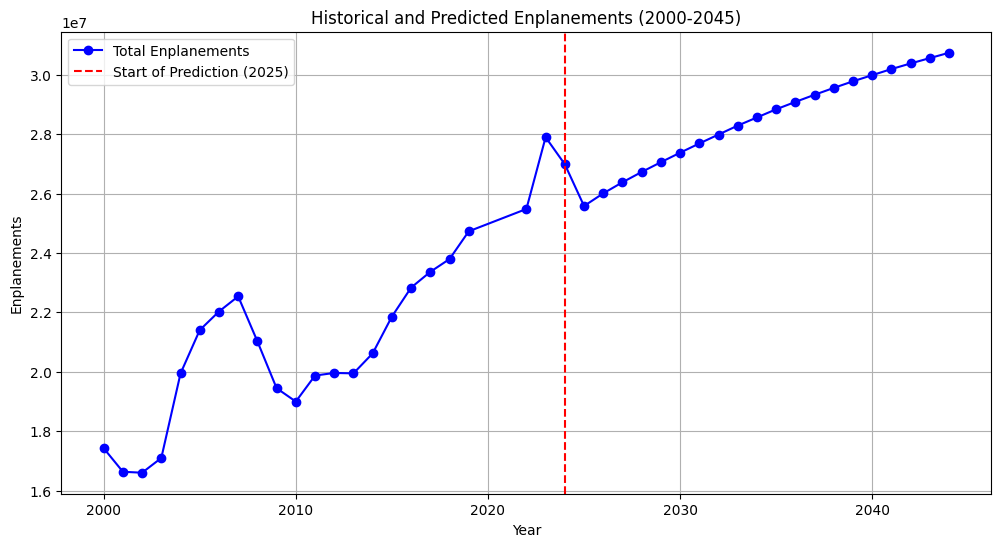

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Select Relevant Columns from Historical Data (2000-2024)
historical_data = df[['years', 'enplanments', 'clark-county_population']]
#historical_data = df[['years', 'enplanments', 'clark-county_population']]
#  Select Relevant Columns from Predicted Data (2025-2045)
predicted_data = future_years[['years', 'Predicted_Enplanements', 'clark-county_population']]

#  Rename columns to align for plotting
predicted_data = predicted_data.rename(columns={'Predicted_Enplanements': 'enplanments'})

#  Concatenate the two datasets to form a continuous timeline
total_data = pd.concat([historical_data, predicted_data], ignore_index=True)

# Plot Historical & Predicted Enplanements
plt.figure(figsize=(12, 6))
plt.plot(total_data['years'], total_data['enplanments'], marker='o', linestyle='-', color='b', label='Total Enplanements')

#  Highlight Historical Data
plt.axvline(x=2024, color='r', linestyle='--', label='Start of Prediction (2025)')
plt.xlabel('Year')
plt.ylabel('Enplanements')
plt.title('Historical and Predicted Enplanements (2000-2045)')
plt.legend()
plt.grid()
plt.show()

##Remove years: 2020, 2021, 2022

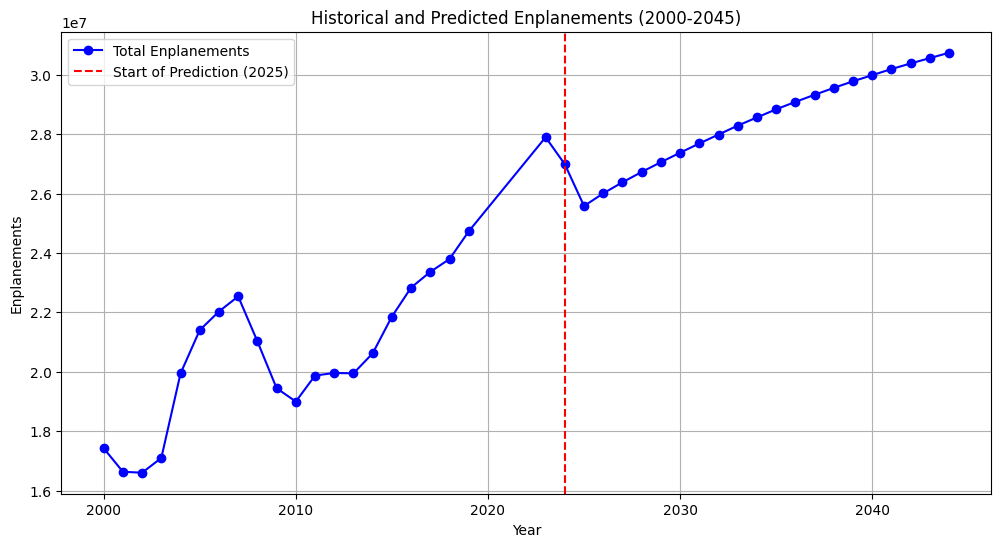

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a separate copy of df for this specific use case
df_filtered = df.copy()

# Exclude the years 2020, 2021, and 2022 only for this instance
df_filtered = df_filtered[~df_filtered['years'].isin([2020, 2021, 2022])]

# Select Relevant Columns from Historical Data (2000-2024)
historical_data = df_filtered[['years', 'enplanments', 'clark-county_population']]

# Select Relevant Columns from Predicted Data (2025-2045)
predicted_data = future_years[['years', 'Predicted_Enplanements', 'clark-county_population']]

# Rename columns to align for plotting
predicted_data = predicted_data.rename(columns={'Predicted_Enplanements': 'enplanments'})

# Concatenate the two datasets to form a continuous timeline
total_data = pd.concat([historical_data, predicted_data], ignore_index=True)

# Plot Historical & Predicted Enplanements
plt.figure(figsize=(12, 6))
plt.plot(total_data['years'], total_data['enplanments'], marker='o', linestyle='-', color='b', label='Total Enplanements')

# Highlight Historical Data
plt.axvline(x=2024, color='r', linestyle='--', label='Start of Prediction (2025)')
plt.xlabel('Year')
plt.ylabel('Enplanements')
plt.title('Historical and Predicted Enplanements (2000-2045)')
plt.legend()
plt.grid()
plt.show()


In [29]:
## Using both GDP and population as the feature variable
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = selected_years.copy()

#  Remove COVID years (2020 & 2021)
df = df[~df["years"].isin([2020, 2021])]

#  Convert ALL numeric columns to float to avoid integer issues with np.log()
df["enplanments"] = df["enplanments"].astype(float)
df["clark-county_population"] = df["clark-county_population"].astype(float)

#  Apply Log Transformation (After Ensuring Data is Float).Without logs, the relationship is curved, but with logs, it becomes linear.
df["log_enplanements"] = np.log(df["enplanments"])
df["log_population"] = np.log(df["clark-county_population"])

df['log_GDP_PerCapita'] = np.log(df['real_gdp_per_person'])
#  Define Independent (X) & Dependent (Y) Variables
X = sm.add_constant(df[['log_population', 'log_GDP_PerCapita']])  # Adding a constant for OLS
#X = sm.add_constant(df[[ 'log_GDP_PerCapita']])
# Why Add a Constant?
# The regression model equation is: Y = β₀ + β1X + Error
# sm.add_constant() ensures that the model includes an intercept (β₀).

Y = df["log_enplanements"] # The transformed enplanements data we want to predict.

# Train the model using ordinary Least Squares (OLS) regression. The model tries to find the best-fit line that minimizes the sum of squared residuals.
model = sm.OLS(Y, X).fit()

#  Print Summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       log_enplanements   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     92.42
Date:                Sun, 27 Apr 2025   Prob (F-statistic):           7.87e-11
Time:                        00:38:21   Log-Likelihood:                 39.005
No. Observations:                  23   AIC:                            -72.01
Df Residuals:                      20   BIC:                            -68.60
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2479      1.31

## Above Model Summary
R-squared: 0.902 → The model explains 90.2% of the variance in enplanements.
Adj. R-squared: 0.893 → Slightly lower, accounts for the number of predictors.
F-statistic: 92.42, Prob(F-statistic): 7.87e-11 → Model is highly significant (p-value near 0).

**Interpretation:**
log_population (-0.0529)

Not statistically significant (p=0.767).
Population changes do not significantly impact enplanements in this model.
The coefficient is negative, implying a slight inverse relationship, but since it's insignificant, it's unreliable.

log_GDP_PerCapita (1.6362)

Highly significant (p=0.000).
If GDP per capita increases by 1%, enplanements increase by 1.64% on average.
Strong positive relationship between GDP per capita and enplanements.

3. Model Diagnostics
Omnibus (2.229), Prob(Omnibus) (0.328) → Residuals are normally distributed.

Durbin-Watson (0.736) → Some evidence of positive autocorrelation (values close to 2 are ideal).


In [30]:
## Only GDP per capita as the feature variable(excluded years 2020, 2021) OLS Model
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = selected_years.copy()

#  Remove COVID years (2020 & 2021)
df = df[~df["years"].isin([2020, 2021])]
#df = df[~df["years"].isin([2020])]

#  Convert ALL numeric columns to float to avoid integer issues with np.log()
df["enplanments"] = df["enplanments"].astype(float)
#df["clark-county_population"] = df["clark-county_population"].astype(float)

#  Apply Log Transformation (After Ensuring Data is Float).Without logs, the relationship is curved, but with logs, it becomes linear.
df["log_enplanements"] = np.log(df["enplanments"])
#df["log_population"] = np.log(df["clark-county_population"])

df['log_GDP_PerCapita'] = np.log(df['real_gdp_per_person'])
#  Define Independent (X) & Dependent (Y) Variables
#X = sm.add_constant(df[['log_population', 'log_GDP_PerCapita']])  # Adding a constant for OLS
X = sm.add_constant(df[[ 'log_GDP_PerCapita']])
# Why Add a Constant?
# The regression model equation is: Y = β₀ + β1X + Error
# sm.add_constant() ensures that the model includes an intercept (β₀).

Y = df["log_enplanements"] # The transformed enplanements data we want to predict.

# Train the model using ordinary Least Squares (OLS) regression. The model tries to find the best-fit line that minimizes the sum of squared residuals.
model = sm.OLS(Y, X).fit()

#  Print Summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       log_enplanements   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     193.1
Date:                Sun, 27 Apr 2025   Prob (F-statistic):           4.65e-12
Time:                        00:38:29   Log-Likelihood:                 38.953
No. Observations:                  23   AIC:                            -73.91
Df Residuals:                      21   BIC:                            -71.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3976      1.18

## Above result Interpretation:

Removing population improved the model’s interpretability (no multicollinearity issue).
The model fits the data well (90.2%), but some autocorrelation remains

In [31]:
#Future prediction by using above model(GDP per capita as the feature variable) (excluded years:2020, 2021)
# Extract model coefficients
intercept, slope = model.params


# Generate Future Years (2025-2045)


# Create a DataFrame for future years (2025-2045)
future_years = pd.DataFrame({'years': np.arange(2025, 2046)})

#predicted population values
predicted_gdp_per_capita = {
    2025: 49586, 2026: 50131, 2027: 50783, 2028: 51596, 2029: 52421,
    2030: 53207, 2031: 53952, 2032: 54708, 2033: 55474, 2034: 56250,
    2035: 56981, 2036: 57722, 2037: 58473, 2038: 59233, 2039: 60003,
    2040: 60783, 2041: 61512, 2042: 62250, 2043: 63060, 2044: 63879,
    2045: 64710
}

# Add the predicted population to the future DataFrame
future_years['predicted_gdp_per_capita'] = future_years['years'].map(predicted_gdp_per_capita)

# Predict Future Enplanements

# Apply Regression Formula to Predict Log Enplanements
future_years['Predicted_Log_Enplanements'] = intercept + slope * np.log(future_years['predicted_gdp_per_capita']) # this applies the linear regression formula.  log(Enplanements)=intercept+slope×log(Population)

# Convert Log Enplanements Back to Actual Enplanements using exponential function.
future_years['Predicted_Enplanements'] = np.exp(future_years['Predicted_Log_Enplanements'])



#  Display Results
print(future_years)

    years  predicted_gdp_per_capita  Predicted_Log_Enplanements  \
0    2025                     49586                          17   
1    2026                     50131                          17   
2    2027                     50783                          17   
3    2028                     51596                          17   
4    2029                     52421                          17   
5    2030                     53207                          17   
6    2031                     53952                          17   
7    2032                     54708                          17   
8    2033                     55474                          17   
9    2034                     56250                          17   
10   2035                     56981                          17   
11   2036                     57722                          17   
12   2037                     58473                          17   
13   2038                     59233                          1

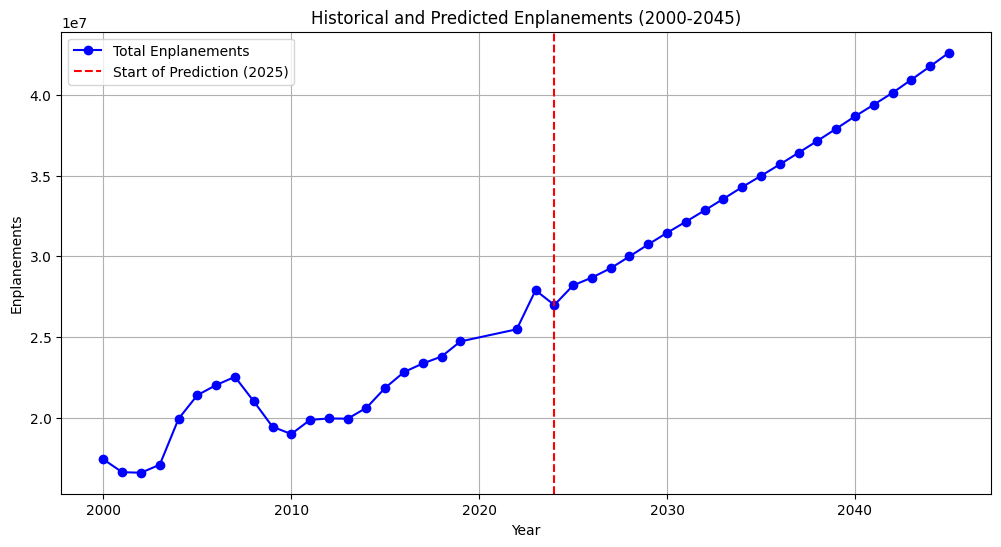

In [32]:
# OLS Model with GDP per capita as feature
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Select Relevant Columns from Historical Data (2000-2024)
#historical_data = df[~df['years'].isin([2020,2021])][['years', 'enplanments', 'real_gdp_per_person']].copy()

historical_data = df[['years', 'enplanments', 'real_gdp_per_person']]
#historical_data = df[['years', 'enplanments', 'clark-county_population']]
#  Select Relevant Columns from Predicted Data (2025-2045)
predicted_data = future_years[['years', 'Predicted_Enplanements', 'Predicted_Log_Enplanements']]

#  Rename columns to align for plotting
predicted_data = predicted_data.rename(columns={'Predicted_Enplanements': 'enplanments'})

#  Concatenate the two datasets to form a continuous timeline
total_data = pd.concat([historical_data, predicted_data], ignore_index=True)

# Plot Historical & Predicted Enplanements
plt.figure(figsize=(12, 6))
plt.plot(total_data['years'], total_data['enplanments'], marker='o', linestyle='-', color='b', label='Total Enplanements')

#  Highlight Historical Data
plt.axvline(x=2024, color='r', linestyle='--', label='Start of Prediction (2025)')
plt.xlabel('Year')
plt.ylabel('Enplanements')
plt.title('Historical and Predicted Enplanements (2000-2045)')
plt.legend()
plt.grid()
plt.show()

## Polynomial Regression

In [ ]:
# # Use polinomial regression, Feature variable population. excluded years: 2020, 2021
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import PolynomialFeatures, StandardScaler
# from sklearn.linear_model import LinearRegression

# #  Use dataset without COVID years (Ensuring No Data Issues)
# historical_data = df[['years', 'clark-county_population', 'enplanments']].dropna()

# # Define Independent (X) & Dependent Variable (Y)
# X = historical_data[['years', 'clark-county_population']]
# y = historical_data['enplanments']

# #  Apply Scaling to Population (Fix Scaling Issue)
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)  # Standardize both years & population

# #  Apply Polynomial Feature Transformation (Lower Degree = 3 or 4 to Avoid Overfitting)
# poly = PolynomialFeatures(degree=2, include_bias=False)
# X_poly = poly.fit_transform(X_scaled)

# #  Train Polynomial Regression Model
# model = LinearRegression()
# model.fit(X_poly, y)

# #  Predict Future Enplanements for 2025-2045
# future_years['years'] = np.arange(2025, 2045)
# X_future = future_years[['years', 'clark-county_population']]
# X_future_scaled = scaler.transform(X_future)  # Apply same scaling
# X_future_poly = poly.transform(X_future_scaled)  # Transform features
# future_years['Predicted_Enplanements'] = model.predict(X_future_poly)

# #  Combine Historical and Predicted Data
# total_data = pd.concat([
#     historical_data,
#     future_years[['years', 'Predicted_Enplanements']].rename(columns={'Predicted_Enplanements': 'enplanments'})
# ], ignore_index=True)

# #  Plot Historical & Predicted Enplanements
# plt.figure(figsize=(12, 6))
# plt.scatter(historical_data['years'], historical_data['enplanments'], color='blue', label='Actual Enplanements')
# plt.plot(total_data['years'], total_data['enplanments'], marker='o', linestyle='-', color='red', label='Polynomial Fit')

# # Highlight Prediction Start
# plt.axvline(x=2024, color='r', linestyle='--', label='Start of Prediction (2025)')
# plt.xlabel('Year')
# plt.ylabel('Enplanements')
# plt.title('Historical and Predicted Enplanements (Fixed Polynomial Regression)')
# plt.legend()
# plt.grid()
# plt.show()

**Use Population and GDP per capita as the feature variable:    **        

**because covid 19 pandemic drastically reduced air travel in 2020 and 2021 and including those years is skewing the regression results, since population did not change much, but enplanments dropped suddenly. Use Population and GDP per capita as the feature variable

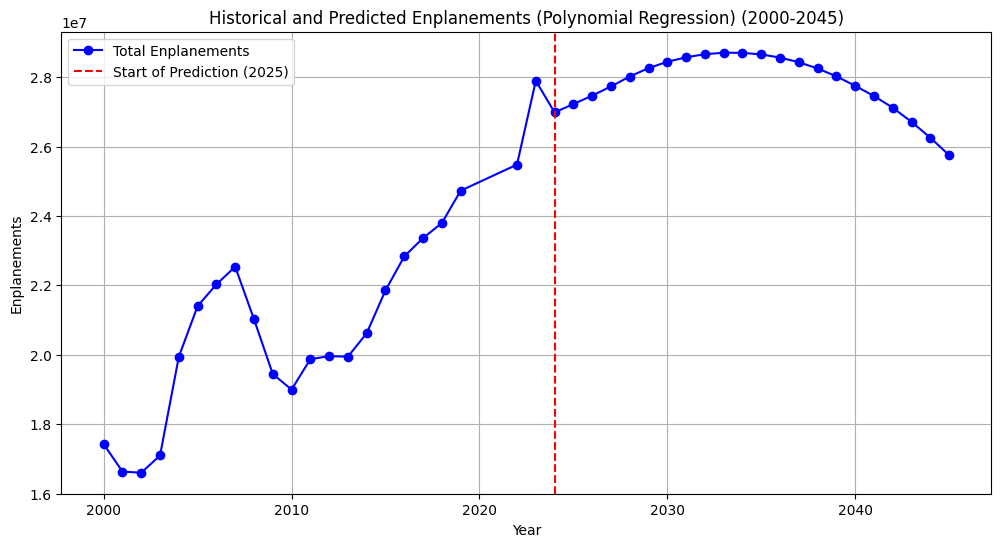

    years  Predicted_Enplanements
0    2025                27224138
1    2026                27467376
2    2027                27731521
3    2028                28018638
4    2029                28260594
5    2030                28443606
6    2031                28573423
7    2032                28661113
8    2033                28704294
9    2034                28700954
10   2035                28654474
11   2036                28564663
12   2037                28430194
13   2038                28250220
14   2039                28023714
15   2040                27750057
16   2041                27455247
17   2042                27119681
18   2043                26710114
19   2044                26254190
20   2045                25751059


In [ ]:
# use only GDP per person and applying polynomial regression( excluded years: 2020, 2021)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 1. Prepare Data (2000-2024) for Training

#historical_data = df[~df['years'].isin([2020,2021])][['years', 'enplanments', 'real_gdp_per_person']].copy()
historical_data = df[['years', 'enplanments', 'real_gdp_per_person']].copy()
#historical_data = df[~df['years'].isin([2020])][['years', 'enplanments', 'real_gdp_per_person']].copy()


# Apply Log Transformation to Enplanements (to normalize data)
historical_data["log_enplanements"] = np.log(historical_data["enplanments"])

# 2. Define Features (Only GDP Per Capita) & Target (Dependent Variable)
X = historical_data[['real_gdp_per_person']]  # Only GDP Per Capita
Y = historical_data["log_enplanements"]  # Log-transformed enplanements

# 3. Apply Polynomial Transformation (Degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)  # Transform Features

# 4. Train Polynomial Regression Model
model = LinearRegression()
model.fit(X_poly, Y)

# 5. Prepare Future Data (2025-2045)
future_years = pd.DataFrame({'years': np.arange(2025, 2046)})

# Predicted GDP Per Capita Values for Future Years
predicted_gdp_per_capita = {
    2025: 49586, 2026: 50131, 2027: 50783, 2028: 51596, 2029: 52421,
    2030: 53207, 2031: 53952, 2032: 54708, 2033: 55474, 2034: 56250,
    2035: 56981, 2036: 57722, 2037: 58473, 2038: 59233, 2039: 60003,
    2040: 60783, 2041: 61512, 2042: 62250, 2043: 63060, 2044: 63879,
    2045: 64710
}

# Add Predicted GDP Per Capita to Future DataFrame
future_years['real_gdp_per_person'] = future_years['years'].map(predicted_gdp_per_capita)

# 6. Predict Future Enplanements Using Polynomial Model
X_future = future_years[['real_gdp_per_person']]
X_future_poly = poly.transform(X_future)  # Transform Features

# Predict Log Enplanements
future_years['Predicted_Log_Enplanements'] = model.predict(X_future_poly)

# Convert Log Enplanements Back to Actual Enplanements
future_years['Predicted_Enplanements'] = np.exp(future_years['Predicted_Log_Enplanements'])

# 7. Combine Historical & Predicted Data
historical_data = df[['years', 'enplanments', 'real_gdp_per_person']]
predicted_data = future_years[['years', 'Predicted_Enplanements']]
predicted_data = predicted_data.rename(columns={'Predicted_Enplanements': 'enplanments'})

# Merge into One Dataset
total_data = pd.concat([historical_data, predicted_data], ignore_index=True)

# 8. Plot Results
plt.figure(figsize=(12, 6))
plt.plot(total_data['years'], total_data['enplanments'], marker='o', linestyle='-', color='b', label='Total Enplanements')

# Highlight Prediction Start
plt.axvline(x=2024, color='r', linestyle='--', label='Start of Prediction (2025)')
plt.xlabel('Year')
plt.ylabel('Enplanements')
plt.title('Historical and Predicted Enplanements (Polynomial Regression) (2000-2045)')
plt.legend()
plt.grid()
plt.show()


# 9. Display Predicted Enplanements Numerically in Full Format
pd.options.display.float_format = '{:.0f}'.format  # Disable scientific notation
print(future_years[['years', 'Predicted_Enplanements']])


Polynomial Regression Model Results:
R-squared: 0.9754
Coefficients: [ 2.41398843e-10 -5.97763798e-13 -1.85236774e-11  2.00397774e-09
 -5.12117489e-08 -1.21258483e-18  7.29764195e-16 -6.75436801e-14
  1.66902112e-12]
Intercept: 14.785680171552595


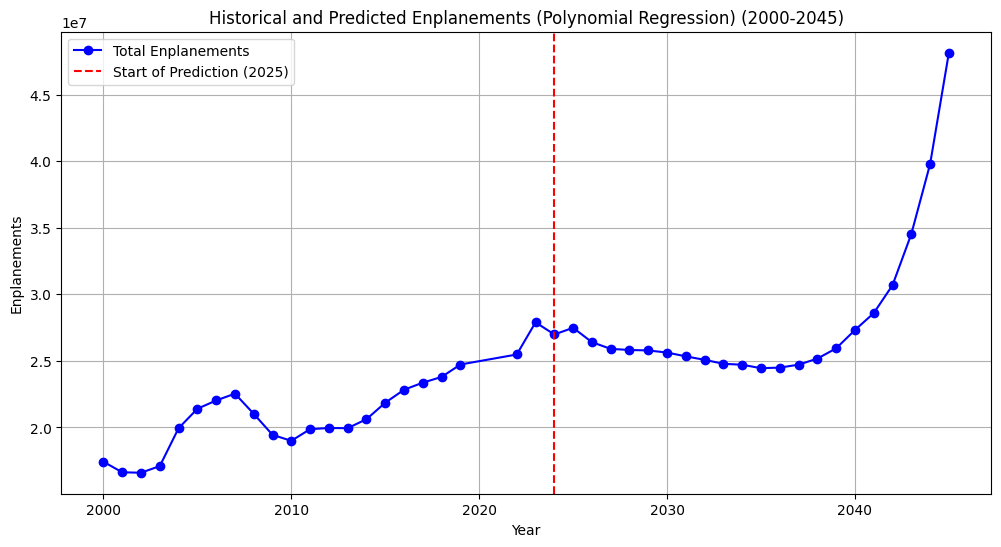

In [ ]:
# Apply polinomial regression on both population and GDP per capita (excluded years 2020, 2021)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 1. Prepare Data (2000-2024) for Training
historical_data = selected_years[['years', 'enplanments', 'clark-county_population', 'real_gdp_per_person']].copy()
# 1. Prepare Data (2000-2024) for Training (Exclude 2020 & 2021)
historical_data = selected_years[~selected_years['years'].isin([2020, 2021,2022])].copy()

# Apply Log Transformation to Enplanements (to normalize data)
historical_data["log_enplanements"] = np.log(historical_data["enplanments"])

# 2. Define Features (Independent Variables) & Target (Dependent Variable)
X = historical_data[['clark-county_population', 'real_gdp_per_person']]
Y = historical_data["log_enplanements"]  # Log-transformed enplanements

# 3. Apply Polynomial Transformation (Degree 2)
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)  # Transform Features

# 4. Train Polynomial Regression Model
model = LinearRegression()
model.fit(X_poly, Y)

# Model Summary
Y_pred = model.predict(X_poly)  # Predict training data
r2 = r2_score(Y, Y_pred)  # Calculate R-squared
print("Polynomial Regression Model Results:")
print(f"R-squared: {r2:.4f}")
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# 5. Prepare Future Data (2025-2045)
future_years = pd.DataFrame({'years': np.arange(2025, 2046)})
predicted_population = {
    2025: 2443000, 2026: 2493000, 2027: 2537000, 2028: 2578000, 2029: 2617000,
    2030: 2655000, 2031: 2692000, 2032: 2728000, 2033: 2764000, 2034: 2797000,
    2035: 2830000, 2036: 2860000, 2037: 2889000, 2038: 2917000, 2039: 2944000,
    2040: 2969000, 2041: 2994000, 2042: 3017000, 2043: 3039000, 2044: 3061000,
    2045: 3081000
}
predicted_gdp_per_capita = {
    2025: 49586, 2026: 50131, 2027: 50783, 2028: 51596, 2029: 52421,
    2030: 53207, 2031: 53952, 2032: 54708, 2033: 55474, 2034: 56250,
    2035: 56981, 2036: 57722, 2037: 58473, 2038: 59233, 2039: 60003,
    2040: 60783, 2041: 61512, 2042: 62250, 2043: 63060, 2044: 63879,
    2045: 64710
}

# Add Predicted Population & GDP per Capita to Future DataFrame
future_years['clark-county_population'] = future_years['years'].map(predicted_population)
future_years['real_gdp_per_person'] = future_years['years'].map(predicted_gdp_per_capita)

# 6. Predict Future Enplanements Using Polynomial Model
X_future = future_years[['clark-county_population', 'real_gdp_per_person']]
X_future_poly = poly.transform(X_future)  # Transform Features

# Predict Log Enplanements
future_years['Predicted_Log_Enplanements'] = model.predict(X_future_poly)

# Convert Log Enplanements Back to Actual Enplanements
future_years['Predicted_Enplanements'] = np.exp(future_years['Predicted_Log_Enplanements'])

# 7. Combine Historical & Predicted Data
historical_data = df[['years', 'enplanments', 'real_gdp_per_person']]
predicted_data = future_years[['years', 'Predicted_Enplanements']]
predicted_data = predicted_data.rename(columns={'Predicted_Enplanements': 'enplanments'})

# Merge into One Dataset
total_data = pd.concat([historical_data, predicted_data], ignore_index=True)

# 8. Plot Results
plt.figure(figsize=(12, 6))
plt.plot(total_data['years'], total_data['enplanments'], marker='o', linestyle='-', color='b', label='Total Enplanements')

# Highlight Prediction Start
plt.axvline(x=2024, color='r', linestyle='--', label='Start of Prediction (2025)')
plt.xlabel('Year')
plt.ylabel('Enplanements')
plt.title('Historical and Predicted Enplanements (Polynomial Regression) (2000-2045)')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Above enplanments predicted numeric values
# Display Predicted Enplanements Values
print(future_years[['years', 'Predicted_Enplanements']])




    years  Predicted_Enplanements
0    2025                27485895
1    2026                26406831
2    2027                25902984
3    2028                25821227
4    2029                25783913
5    2030                25626313
6    2031                25339942
7    2032                25078312
8    2033                24782537
9    2034                24709792
10   2035                24452311
11   2036                24495199
12   2037                24716450
13   2038                25170873
14   2039                25942713
15   2040                27316461
16   2041                28587036
17   2042                30683086
18   2043                34526032
19   2044                39778042
20   2045                48145860
